### Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
plt.style.use("fivethirtyeight")

In [2]:
# Read the data and set the prsn_intn_id as the index.

tobacco = pd.read_csv('./Tobacco.csv', index_col='PRSN_INTN_ID', parse_dates=True)

In [3]:
tobacco.head()

,BENEFIT_PROGRAM,EMPL_STATUS,EMPL_CLASS,UNION_CODE,SUPP_LIFE_PLAN,SUPP_LIFE_OPTION,SUPP_LIFE_BEGIN,TOBACCO_USER,BRTH_DT,Age as of 1/1/19,GENDER,SPOUSE,NUM_CHILD,LOCATION,WRK_STATE,ANNUAL_PAY
PRSN_INTN_ID,,,,,,,,,,,,,,,,
10050,WNB,ACTIVE,M,NaN,8954,Opt Out,1/1/2019,N,9/15/1989,29,M,NaN,0,Chase Building Chicago,IL,96900.00
10063,WNB,ACTIVE,M,NaN,8954,5 x Pay,1/1/2019,Y,9/7/1976,42,F,S,2,Point Street,MD,78000.00
100009,WNB,ACTIVE,M,NaN,8954,3 x Pay,1/1/2019,Y,12/7/1967,51,M,S,0,Quad Cities NPS Sta 4,IL,141324.24
100061,WNB,ACTIVE,M,NaN,8954,Opt Out,1/1/2019,N,1/3/1954,65,M,S,3,Quad Cities NPS Sta 4,IL,103866.84
361800052,OMC,ACTIVE,H,NaN,8954,8 x Pay,1/1/2019,Y,7/22/1999,19,M,NaN,0,Lord Baltimore Building,MD,47059.68


In [4]:
#what are the data types?
tobacco.dtypes

BENEFIT_PROGRAM      object
EMPL_STATUS          object
EMPL_CLASS           object
UNION_CODE           object
SUPP_LIFE_PLAN        int64
SUPP_LIFE_OPTION     object
SUPP_LIFE_BEGIN      object
TOBACCO_USER         object
BRTH_DT              object
Age as of 1/1/19      int64
GENDER               object
SPOUSE               object
NUM_CHILD             int64
LOCATION             object
WRK_STATE            object
ANNUAL_PAY          float64
dtype: object

In [5]:
# Number of rows and columns (.shape)
tobacco.shape

(28558, 16)

In [6]:
tobacco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28558 entries, 10050 to 499900038
Data columns (total 16 columns):
BENEFIT_PROGRAM     28558 non-null object
EMPL_STATUS         28558 non-null object
EMPL_CLASS          28558 non-null object
UNION_CODE          6366 non-null object
SUPP_LIFE_PLAN      28558 non-null int64
SUPP_LIFE_OPTION    28558 non-null object
SUPP_LIFE_BEGIN     28558 non-null object
TOBACCO_USER        25161 non-null object
BRTH_DT             28558 non-null object
Age as of 1/1/19    28558 non-null int64
GENDER              28558 non-null object
SPOUSE              20635 non-null object
NUM_CHILD           28558 non-null int64
LOCATION            28536 non-null object
WRK_STATE           28366 non-null object
ANNUAL_PAY          28558 non-null float64
dtypes: float64(1), int64(3), object(12)
memory usage: 3.7+ MB


In [7]:
#check for null values
tobacco.isnull().sum()

BENEFIT_PROGRAM         0
EMPL_STATUS             0
EMPL_CLASS              0
UNION_CODE          22192
SUPP_LIFE_PLAN          0
SUPP_LIFE_OPTION        0
SUPP_LIFE_BEGIN         0
TOBACCO_USER         3397
BRTH_DT                 0
Age as of 1/1/19        0
GENDER                  0
SPOUSE               7923
NUM_CHILD               0
LOCATION               22
WRK_STATE             192
ANNUAL_PAY              0
dtype: int64

In [8]:
# Rename Age as of 1/1/19 column to AGE
tobacco.rename(columns={'Age as of 1/1/19':'AGE'}, inplace=True)

In [9]:
#find the different values for UNION_CODE to see what we want to populate the blanks with

tobacco['UNION_CODE'].value_counts()

10      1197
1900    1028
1238     533
23       474
210      362
1307     258
4        253
37       226
11       198
2        187
15       149
16       134
18       133
19       120
13       119
20       111
238A     109
21       106
17       103
14        96
3         96
38        93
9         84
307A      53
24        38
25        31
2105      26
40        25
7         17
1          4
NONE       2
NM         1
Name: UNION_CODE, dtype: int64

In [10]:
#Union Code can be a blank value - I need to give it a default value if currently blank
tobacco['UNION_CODE'].fillna('N', inplace=True)

In [11]:
#assign Y if in a Union, N if not (a blank (now N from previous code) or NONE)
tobacco['UNION_CODE'] = tobacco['UNION_CODE'].apply(lambda x: 'N' 
                                                           if x in ('NONE','N')
                                                           else 'Y')

In [12]:
#confirm union code was updated as expected - NONE increase and no blanks
tobacco['UNION_CODE'].value_counts()

N    22194
Y     6364
Name: UNION_CODE, dtype: int64

In [13]:
#check for null values
tobacco.isnull().sum()

BENEFIT_PROGRAM        0
EMPL_STATUS            0
EMPL_CLASS             0
UNION_CODE             0
SUPP_LIFE_PLAN         0
SUPP_LIFE_OPTION       0
SUPP_LIFE_BEGIN        0
TOBACCO_USER        3397
BRTH_DT                0
AGE                    0
GENDER                 0
SPOUSE              7923
NUM_CHILD              0
LOCATION              22
WRK_STATE            192
ANNUAL_PAY             0
dtype: int64

In [14]:
#Spouse can be a blank value - I need to give it a default value if currently blank
tobacco['SPOUSE'].fillna('N', inplace=True)

In [15]:
#confirm Spouse was updated as expected - NONE increase and no blanks
tobacco['SPOUSE'].value_counts()

S     19363
N      7923
DP     1272
Name: SPOUSE, dtype: int64

In [16]:
#assign Y if they have a 'S'pouse or Domestic Partner (DP), or keep N if no spouse
tobacco['SPOUSE'] = tobacco['SPOUSE'].apply(lambda x: 'Y' 
                                            if x in ('S','DP')
                                            else x)

In [17]:
#confirm SPOUSE was updated as expected
tobacco['SPOUSE'].value_counts()

Y    20635
N     7923
Name: SPOUSE, dtype: int64

In [18]:
#check for null values
tobacco.isnull().sum()

BENEFIT_PROGRAM        0
EMPL_STATUS            0
EMPL_CLASS             0
UNION_CODE             0
SUPP_LIFE_PLAN         0
SUPP_LIFE_OPTION       0
SUPP_LIFE_BEGIN        0
TOBACCO_USER        3397
BRTH_DT                0
AGE                    0
GENDER                 0
SPOUSE                 0
NUM_CHILD              0
LOCATION              22
WRK_STATE            192
ANNUAL_PAY             0
dtype: int64

In [19]:
#Location and Work State can be a blank value - I need to give it a default value if currently blank
tobacco['LOCATION'].fillna('NA', inplace=True)
tobacco['WRK_STATE'].fillna('NA', inplace=True)

In [20]:
#confirm union code was updated as expected - NONE increase and no blanks
tobacco['LOCATION'].value_counts()

Point Street                      1187
PECO Main Office Building         1008
Limerick NPS                       952
Nine Mile Point                    910
Peach Bottom APS                   899
Calvert Cliffs                     848
New Castle Regional Office         699
Clinton Power Station              689
Edison Place                       675
2 Lincoln Centre                   671
Chase Building  Chicago            645
FitzPatrick NPP                    623
SGC-Office Storage Facility        612
Three Mile Island NPS              603
Dresden NPS Sta 12                 540
Lord Baltimore Building            537
Quad Cities NPS Sta 4              537
BGE Home-Tangier Drive             532
LaSalle NPS Sta 1                  526
Gas & Electric Building            524
Byron NPS Sta 6                    500
Braidwood NPS Sta 20               462
GINNA Station                      442
Exelon Generation at Cantera       426
3 Lincoln Centre                   415
Kennett Square 200       

In [21]:
#confirm union code was updated as expected - NONE increase and no blanks
tobacco['WRK_STATE'].value_counts()

IL    7489
MD    7273
PA    6255
NY    2041
DC    1418
NJ    1375
DE    1191
TX     507
MA     227
NA     192
WI     161
KY      95
TN      49
CA      44
GA      35
MI      30
AL      28
OH      21
IA      18
KS      13
FL      10
CT       9
IN       9
NE       8
NH       7
NC       7
MN       6
SC       6
VA       5
UT       4
AZ       4
NV       4
CO       3
MO       3
AR       2
OR       2
OK       2
WA       2
RI       1
WY       1
ID       1
Name: WRK_STATE, dtype: int64

In [22]:
tobacco.isnull().sum()

BENEFIT_PROGRAM        0
EMPL_STATUS            0
EMPL_CLASS             0
UNION_CODE             0
SUPP_LIFE_PLAN         0
SUPP_LIFE_OPTION       0
SUPP_LIFE_BEGIN        0
TOBACCO_USER        3397
BRTH_DT                0
AGE                    0
GENDER                 0
SPOUSE                 0
NUM_CHILD              0
LOCATION               0
WRK_STATE              0
ANNUAL_PAY             0
dtype: int64

In [23]:
#Tobacco code can be a blank value if in No Coverage Option
#If enrolled in No Coverage, we do not want to count that row - drop these records from the file
#Since we have cleaned up all of the other null values, we can now do this:

tobacco.dropna(inplace=True)


In [24]:
tobacco.isnull().sum()

BENEFIT_PROGRAM     0
EMPL_STATUS         0
EMPL_CLASS          0
UNION_CODE          0
SUPP_LIFE_PLAN      0
SUPP_LIFE_OPTION    0
SUPP_LIFE_BEGIN     0
TOBACCO_USER        0
BRTH_DT             0
AGE                 0
GENDER              0
SPOUSE              0
NUM_CHILD           0
LOCATION            0
WRK_STATE           0
ANNUAL_PAY          0
dtype: int64

In [25]:
#verify dataframe information now that we dropped rows:

tobacco.shape

(25161, 16)

In [26]:
tobacco['TOBACCO_USER'].value_counts()

N    16189
Y     8972
Name: TOBACCO_USER, dtype: int64

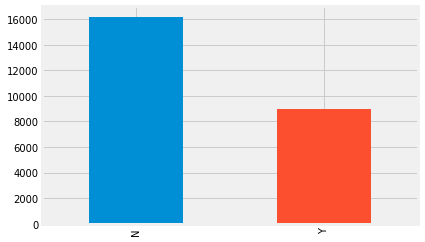

In [27]:
#tobacco users across entire population
tobacco['TOBACCO_USER'].value_counts().plot(kind='bar');

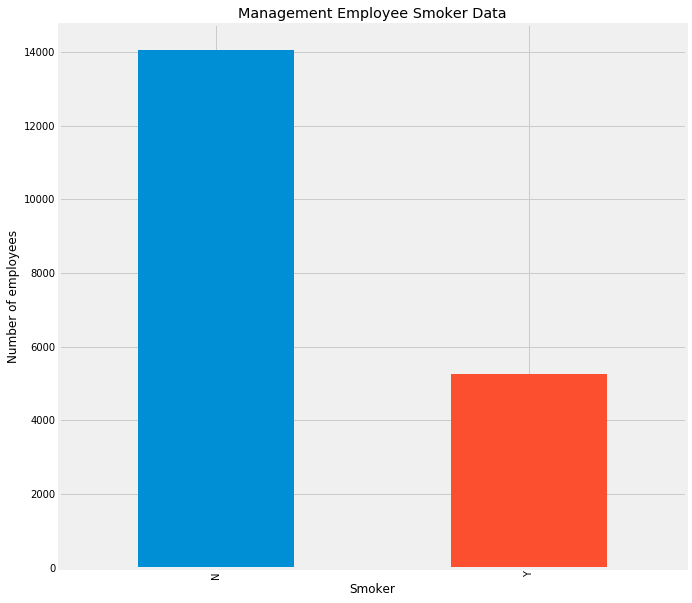

In [28]:
#tobacco users across management/non-union population

tobacco[tobacco['UNION_CODE'] == 'N']['TOBACCO_USER'].value_counts().plot(kind='bar',figsize=(10,10));
plt.xlabel('Smoker');
plt.ylabel('Number of employees');
plt.title('Management Employee Smoker Data');
plt.savefig('./Plots/mgmt_bar.png')

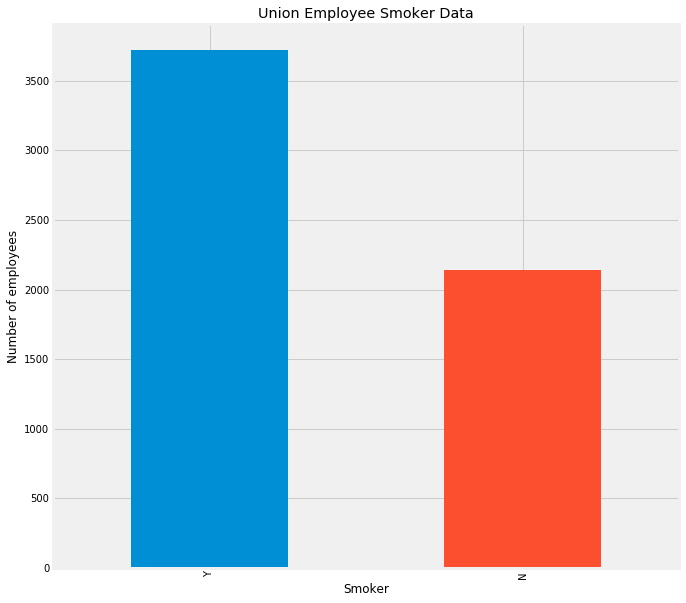

In [29]:
#tobacco users across union population

tobacco[tobacco['UNION_CODE'] == 'Y']['TOBACCO_USER'].value_counts().plot(kind='bar',figsize=(10,10));
plt.xlabel('Smoker');
plt.ylabel('Number of employees');
plt.title('Union Employee Smoker Data');
plt.savefig('./Plots/union_bar.png')

In [30]:
tobacco['WRK_STATE'].value_counts()

MD    6421
IL    6401
PA    5298
NY    1852
DC    1398
NJ    1290
DE    1181
TX     424
MA     206
NA     166
WI     152
KY      81
TN      44
CA      37
GA      35
MI      29
AL      26
OH      18
IA      15
KS      12
FL       9
CT       8
NC       7
NE       6
MN       6
NH       5
NV       4
SC       4
VA       4
AZ       4
IN       3
AR       2
OR       2
OK       2
CO       2
MO       2
UT       2
RI       1
WA       1
WY       1
Name: WRK_STATE, dtype: int64

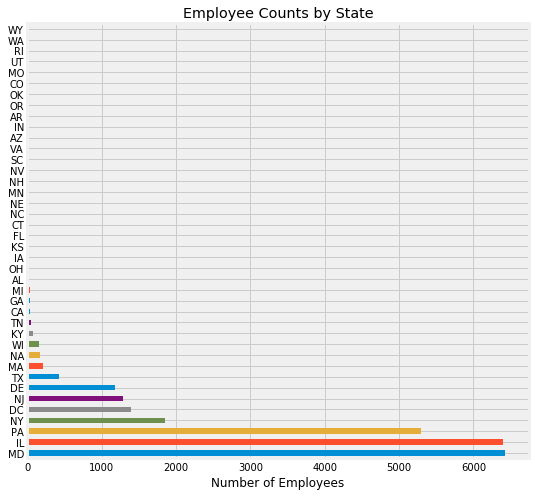

In [31]:
#all workers by state:

tobacco['WRK_STATE'].value_counts().plot(kind='barh',figsize=(8,8));
plt.xlabel('Number of Employees');
plt.title('Employee Counts by State');
plt.savefig('./Plots/all_state_barh.png')

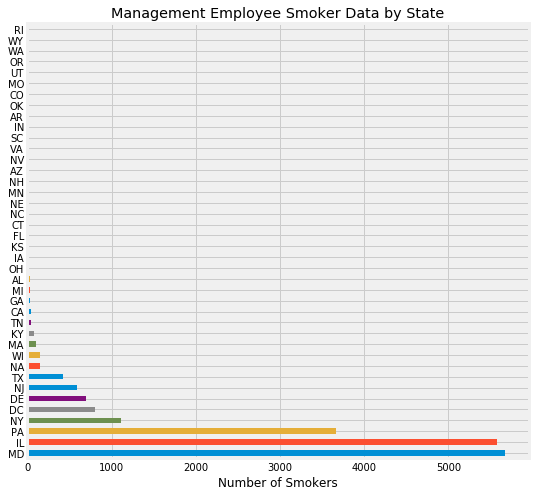

In [32]:
#management/non-union smokers by state:

tobacco[tobacco['UNION_CODE'] == 'N']['WRK_STATE'].value_counts().plot(kind='barh',figsize=(8,8));
plt.xlabel('Number of Smokers');
plt.title('Management Employee Smoker Data by State');
plt.savefig('./Plots/mgmt_state_barh.png')

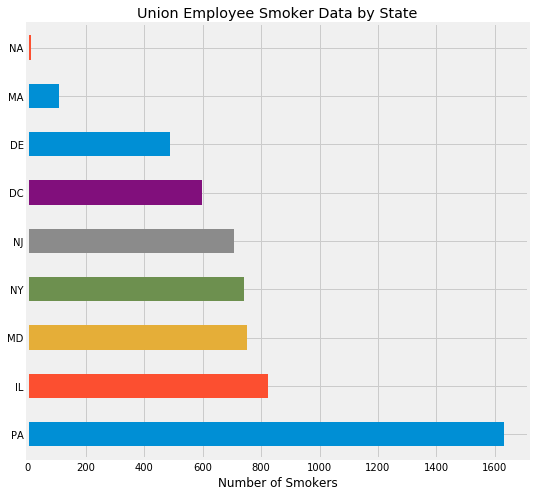

In [33]:
#union smokers by state:

tobacco[tobacco['UNION_CODE'] == 'Y']['WRK_STATE'].value_counts().plot(kind='barh',figsize=(8,8));
plt.xlabel('Number of Smokers');
plt.title('Union Employee Smoker Data by State');
plt.savefig('./Plots/union_state_barh.png')

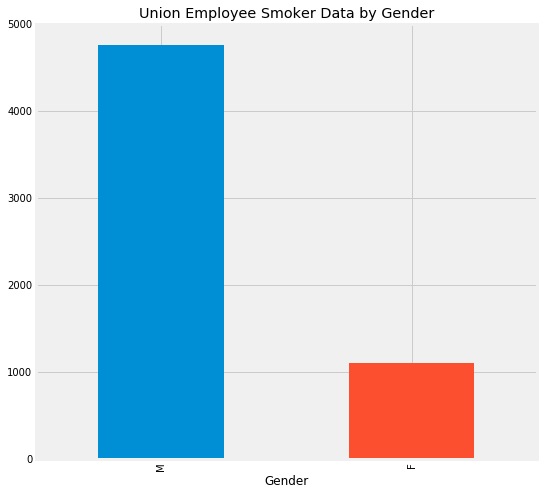

In [34]:
#union smokers by gender:

tobacco[tobacco['UNION_CODE'] == 'Y']['GENDER'].value_counts().plot(kind='bar',figsize=(8,8));
plt.xlabel('Gender');
plt.title('Union Employee Smoker Data by Gender');
plt.savefig('./Plots/union_gender_bar.png')

### Now that the data has been explored, 
### we need to set 1/0's for Y/N values to be able to use them in our modeling


Set Gender to be 1/0's so it can be used in model:

M = 1
F = 0

In [35]:
gender_dummies = pd.get_dummies(tobacco.GENDER, prefix='GENDER')

In [36]:
gender_dummies.head()

,GENDER_F,GENDER_M
PRSN_INTN_ID,,
10050,0,1
10063,1,0
100009,0,1
100061,0,1
361800052,0,1


In [37]:
#drop the GENDER_F column so we can test just if the employee is Male
gender_dummies.drop(gender_dummies.columns[0], axis=1, inplace=True)

In [38]:
gender_dummies.head()

,GENDER_M
PRSN_INTN_ID,
10050,1
10063,0
100009,1
100061,1
361800052,1


In [39]:
# Concatenate the original DataFrame and the dummy DataFrame (axis=0 means rows, axis=1 means columns).
tobacco_dummies = pd.concat([tobacco, gender_dummies], axis=1)

# Print 5 random rows.
tobacco_dummies.sample(n=5, random_state=1)

,BENEFIT_PROGRAM,EMPL_STATUS,EMPL_CLASS,UNION_CODE,SUPP_LIFE_PLAN,SUPP_LIFE_OPTION,SUPP_LIFE_BEGIN,TOBACCO_USER,BRTH_DT,AGE,GENDER,SPOUSE,NUM_CHILD,LOCATION,WRK_STATE,ANNUAL_PAY,GENDER_M
PRSN_INTN_ID,,,,,,,,,,,,,,,,,
10000003,WNB,TERM,M,N,8954,8 x Pay,1/1/2019,N,3/7/1972,47,M,Y,3,Mount Prospect Headquarters,IL,118964.76,1
202200008,OMC,ACTIVE,H,N,8954,3 x Pay,1/1/2019,N,1/29/1964,55,M,Y,1,Fort Smallwood Shops,MD,90999.96,1
121000041,NCE,ACTIVE,H,N,8954,8 x Pay,1/1/2019,N,5/21/1967,52,M,N,2,Peach Bottom APS,PA,106787.16,1
325000037,ENB,ACTIVE,M,N,8954,6 x Pay,1/1/2019,N,8/29/1977,41,M,Y,4,Peach Bottom APS,PA,178401.72,1
160000055,PCU,ACTIVE,N,Y,8954,8 x Pay,1/1/2019,Y,10/29/1952,66,M,Y,0,Oregon Maintenance Shop,PA,84510.36,1


In [40]:
tobacco_dummies.head()

,BENEFIT_PROGRAM,EMPL_STATUS,EMPL_CLASS,UNION_CODE,SUPP_LIFE_PLAN,SUPP_LIFE_OPTION,SUPP_LIFE_BEGIN,TOBACCO_USER,BRTH_DT,AGE,GENDER,SPOUSE,NUM_CHILD,LOCATION,WRK_STATE,ANNUAL_PAY,GENDER_M
PRSN_INTN_ID,,,,,,,,,,,,,,,,,
10050,WNB,ACTIVE,M,N,8954,Opt Out,1/1/2019,N,9/15/1989,29,M,N,0,Chase Building Chicago,IL,96900.00,1
10063,WNB,ACTIVE,M,N,8954,5 x Pay,1/1/2019,Y,9/7/1976,42,F,Y,2,Point Street,MD,78000.00,0
100009,WNB,ACTIVE,M,N,8954,3 x Pay,1/1/2019,Y,12/7/1967,51,M,Y,0,Quad Cities NPS Sta 4,IL,141324.24,1
100061,WNB,ACTIVE,M,N,8954,Opt Out,1/1/2019,N,1/3/1954,65,M,Y,3,Quad Cities NPS Sta 4,IL,103866.84,1
361800052,OMC,ACTIVE,H,N,8954,8 x Pay,1/1/2019,Y,7/22/1999,19,M,N,0,Lord Baltimore Building,MD,47059.68,1


Set Union to be 1/0's so it can be used in model:

Union = 1
Non-Union = 0

In [41]:
union_dummies = pd.get_dummies(tobacco.UNION_CODE, prefix='UNION_CODE')

In [42]:
union_dummies.head()

,UNION_CODE_N,UNION_CODE_Y
PRSN_INTN_ID,,
10050,1,0
10063,1,0
100009,1,0
100061,1,0
361800052,1,0


In [43]:
union_dummies.drop(union_dummies.columns[0], axis=1, inplace=True)

In [44]:
union_dummies.head()

,UNION_CODE_Y
PRSN_INTN_ID,
10050,0
10063,0
100009,0
100061,0
361800052,0


In [45]:
# Concatenate the original DataFrame and the dummy DataFrame (axis=0 means rows, axis=1 means columns).
tobacco_dummies = pd.concat([tobacco_dummies, union_dummies], axis=1)

# Print 5 random rows.
tobacco_dummies.sample(n=5, random_state=1)

,BENEFIT_PROGRAM,EMPL_STATUS,EMPL_CLASS,UNION_CODE,SUPP_LIFE_PLAN,SUPP_LIFE_OPTION,SUPP_LIFE_BEGIN,TOBACCO_USER,BRTH_DT,AGE,GENDER,SPOUSE,NUM_CHILD,LOCATION,WRK_STATE,ANNUAL_PAY,GENDER_M,UNION_CODE_Y
PRSN_INTN_ID,,,,,,,,,,,,,,,,,,
10000003,WNB,TERM,M,N,8954,8 x Pay,1/1/2019,N,3/7/1972,47,M,Y,3,Mount Prospect Headquarters,IL,118964.76,1,0
202200008,OMC,ACTIVE,H,N,8954,3 x Pay,1/1/2019,N,1/29/1964,55,M,Y,1,Fort Smallwood Shops,MD,90999.96,1,0
121000041,NCE,ACTIVE,H,N,8954,8 x Pay,1/1/2019,N,5/21/1967,52,M,N,2,Peach Bottom APS,PA,106787.16,1,0
325000037,ENB,ACTIVE,M,N,8954,6 x Pay,1/1/2019,N,8/29/1977,41,M,Y,4,Peach Bottom APS,PA,178401.72,1,0
160000055,PCU,ACTIVE,N,Y,8954,8 x Pay,1/1/2019,Y,10/29/1952,66,M,Y,0,Oregon Maintenance Shop,PA,84510.36,1,1


Set Smoker to be 1/0's so it can be used in model:

Smoker = 1
Non-Smoker = 0

In [46]:
smoker_dummies = pd.get_dummies(tobacco.TOBACCO_USER, prefix='SMOKER')

In [47]:
smoker_dummies.head()

,SMOKER_N,SMOKER_Y
PRSN_INTN_ID,,
10050,1,0
10063,0,1
100009,0,1
100061,1,0
361800052,0,1


In [48]:
#drop the column that represents that they are NOT in a smoker
#later want to check if SMOKER_Y = 1, that is has an impact
smoker_dummies.drop(smoker_dummies.columns[0], axis=1, inplace=True)

In [49]:
smoker_dummies.head()

,SMOKER_Y
PRSN_INTN_ID,
10050,0
10063,1
100009,1
100061,0
361800052,1


In [50]:
# Concatenate the original DataFrame and the dummy DataFrame (axis=0 means rows, axis=1 means columns).
tobacco_dummies = pd.concat([tobacco_dummies, smoker_dummies], axis=1)

# Print 5 random rows.
tobacco_dummies.sample(n=5, random_state=1)

,BENEFIT_PROGRAM,EMPL_STATUS,EMPL_CLASS,UNION_CODE,SUPP_LIFE_PLAN,SUPP_LIFE_OPTION,SUPP_LIFE_BEGIN,TOBACCO_USER,BRTH_DT,AGE,GENDER,SPOUSE,NUM_CHILD,LOCATION,WRK_STATE,ANNUAL_PAY,GENDER_M,UNION_CODE_Y,SMOKER_Y
PRSN_INTN_ID,,,,,,,,,,,,,,,,,,,
10000003,WNB,TERM,M,N,8954,8 x Pay,1/1/2019,N,3/7/1972,47,M,Y,3,Mount Prospect Headquarters,IL,118964.76,1,0,0
202200008,OMC,ACTIVE,H,N,8954,3 x Pay,1/1/2019,N,1/29/1964,55,M,Y,1,Fort Smallwood Shops,MD,90999.96,1,0,0
121000041,NCE,ACTIVE,H,N,8954,8 x Pay,1/1/2019,N,5/21/1967,52,M,N,2,Peach Bottom APS,PA,106787.16,1,0,0
325000037,ENB,ACTIVE,M,N,8954,6 x Pay,1/1/2019,N,8/29/1977,41,M,Y,4,Peach Bottom APS,PA,178401.72,1,0,0
160000055,PCU,ACTIVE,N,Y,8954,8 x Pay,1/1/2019,Y,10/29/1952,66,M,Y,0,Oregon Maintenance Shop,PA,84510.36,1,1,1


In [51]:
# Correlation matrix (ranges from 1 to -1)
tobacco_dummies.corr()

,SUPP_LIFE_PLAN,AGE,NUM_CHILD,ANNUAL_PAY,GENDER_M,UNION_CODE_Y,SMOKER_Y
SUPP_LIFE_PLAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGE,NaN,1.000000,0.256051,0.298026,0.037301,-0.084016,0.039843
NUM_CHILD,NaN,0.256051,1.000000,0.211378,0.110315,-0.028843,0.109018
ANNUAL_PAY,NaN,0.298026,0.211378,1.000000,0.136420,-0.283563,-0.058345
GENDER_M,NaN,0.037301,0.110315,0.136420,1.000000,0.067165,0.169386
UNION_CODE_Y,NaN,-0.084016,-0.028843,-0.283563,0.067165,1.000000,0.319991
SMOKER_Y,NaN,0.039843,0.109018,-0.058345,0.169386,0.319991,1.000000


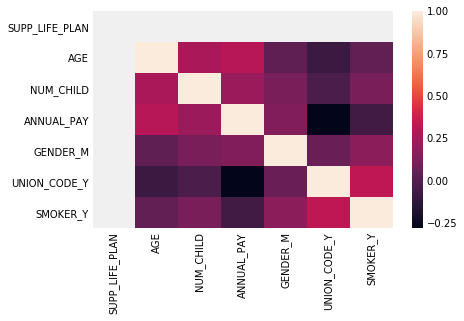

In [52]:
# Visualize correlation matrix in Seaborn using a heat map.
sns.heatmap(tobacco_dummies.corr());

Looking at the correlation matrix above, we can see that UNION_CODE_Y, GENDER_M have some correlation.
Since we have Age at time of hire, and Age also has some correlation to SMOKER_Y, 
lets see if that has value to being a predictor.

Number of Children also has positive correlation, but we will not know if an employee
has children at the time of being hired.

### KNN Model

In [53]:
# Create X and y.
feature_cols = ['UNION_CODE_Y','GENDER_M','AGE']
X = tobacco_dummies[feature_cols]
y = tobacco_dummies['SMOKER_Y']

In [54]:
X.head()

,UNION_CODE_Y,GENDER_M,AGE
PRSN_INTN_ID,,,
10050,0,1,29
10063,0,0,42
100009,0,1,51
100061,0,1,65
361800052,0,1,19


In [55]:
y.head()

PRSN_INTN_ID
10050        0
10063        1
100009       1
100061       0
361800052    1
Name: SMOKER_Y, dtype: uint8

In [56]:
tobacco_2 = pd.concat([X, y], axis=1)

tobacco_2.head()

,UNION_CODE_Y,GENDER_M,AGE,SMOKER_Y
PRSN_INTN_ID,,,,
10050,0,1,29,0
10063,0,0,42,1
100009,0,1,51,1
100061,0,1,65,0
361800052,0,1,19,1


Train test split:

Use KNN:

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

In [59]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [60]:
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.6094420600858369


In [61]:
#grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
parameters = {
    'n_neighbors': np.arange(1,74)
}
gs = GridSearchCV(KNeighborsClassifier(), parameters, cv=3, verbose=2)


In [62]:
gs.fit(X_train, y_train)

Fitting 3 folds for each of 73 candidates, totalling 219 fits
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] .................................... n_neighbors=2, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] .................................... n_neighbors=2, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] .................................... n_neighbors=2, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .................................... n_neighbors=3, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .................................... n_neighbors=3, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .................................... n_neighbors=3, total=   0.0s
[CV] n_neighbors=4 ...................................................
[CV] .

[CV] ................................... n_neighbors=21, total=   0.0s
[CV] n_neighbors=22 ..................................................
[CV] ................................... n_neighbors=22, total=   0.0s
[CV] n_neighbors=22 ..................................................
[CV] ................................... n_neighbors=22, total=   0.0s
[CV] n_neighbors=22 ..................................................
[CV] ................................... n_neighbors=22, total=   0.0s
[CV] n_neighbors=23 ..................................................
[CV] ................................... n_neighbors=23, total=   0.0s
[CV] n_neighbors=23 ..................................................
[CV] ................................... n_neighbors=23, total=   0.0s
[CV] n_neighbors=23 ..................................................
[CV] ................................... n_neighbors=23, total=   0.0s
[CV] n_neighbors=24 ..................................................
[CV] .

[CV] ................................... n_neighbors=41, total=   0.0s
[CV] n_neighbors=41 ..................................................
[CV] ................................... n_neighbors=41, total=   0.1s
[CV] n_neighbors=42 ..................................................
[CV] ................................... n_neighbors=42, total=   0.1s
[CV] n_neighbors=42 ..................................................
[CV] ................................... n_neighbors=42, total=   0.1s
[CV] n_neighbors=42 ..................................................
[CV] ................................... n_neighbors=42, total=   0.1s
[CV] n_neighbors=43 ..................................................
[CV] ................................... n_neighbors=43, total=   0.1s
[CV] n_neighbors=43 ..................................................
[CV] ................................... n_neighbors=43, total=   0.1s
[CV] n_neighbors=43 ..................................................
[CV] .

[CV] ................................... n_neighbors=60, total=   0.1s
[CV] n_neighbors=61 ..................................................
[CV] ................................... n_neighbors=61, total=   0.1s
[CV] n_neighbors=61 ..................................................
[CV] ................................... n_neighbors=61, total=   0.1s
[CV] n_neighbors=61 ..................................................
[CV] ................................... n_neighbors=61, total=   0.1s
[CV] n_neighbors=62 ..................................................
[CV] ................................... n_neighbors=62, total=   0.1s
[CV] n_neighbors=62 ..................................................
[CV] ................................... n_neighbors=62, total=   0.1s
[CV] n_neighbors=62 ..................................................
[CV] ................................... n_neighbors=62, total=   0.1s
[CV] n_neighbors=63 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done 219 out of 219 | elapsed:   29.7s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2, ..., 72, 73])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [63]:
gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=64, p=2,
           weights='uniform')

In [64]:
knn = KNeighborsClassifier(n_neighbors=64)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.7149896677793673


### Make a prediction for an out-of-sample observation.
### Union - Y, Gender - M, Age - 31

In [65]:
# Instantiate the model with the best-known parameters.
knn = KNeighborsClassifier(n_neighbors=64)

# Re-train the model with X and y
knn.fit(X, y)


# input union, gender, and age:
knn.predict(np.array([1, 1, 31]).reshape(1, -1))

array([1], dtype=uint8)

### Union - Y, Gender - F, Age - 31

In [66]:
# Instantiate the model with the best-known parameters.
knn = KNeighborsClassifier(n_neighbors=64)

# Re-train the model with X and y (not X_train and y_train). Why?
knn.fit(X, y)

knn.predict(np.array([1, 0, 31]).reshape(1, -1))

array([0], dtype=uint8)

### Union - N, Gender - M, Age 31

In [67]:
# Instantiate the model with the best-known parameters.
knn = KNeighborsClassifier(n_neighbors=64)

# Re-train the model with X and y 
knn.fit(X, y)

knn.predict(np.array([0, 1, 31]).reshape(1, -1))

array([0], dtype=uint8)

### Union - N, Gender - F, Age 31

In [68]:
# Instantiate the model with the best-known parameters.
knn = KNeighborsClassifier(n_neighbors=64)

# Re-train the model with X and y
knn.fit(X, y)

knn.predict(np.array([0, 0, 31]).reshape(1, -1))

array([0], dtype=uint8)